In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data
Data = pd.read_csv(r'C:\Users\User\Desktop\decision_tree_models\data.csv')
print('Data = \n',Data.head(10))

Data = 
          X1        Y1        X2        Y2        X3        Y3        X4  \
0  0.860019 -3.096488  0.753413 -2.530522  0.629331 -1.962419  0.361692   
1  0.456454 -2.852605  0.565661 -2.188466  0.568863 -1.593943  0.363601   
2 -0.462493 -2.031486 -0.125549 -1.528304  0.123850 -1.026633  0.238231   
3  0.106369 -2.186939  0.116188 -1.520864  0.142727 -0.703652  0.068778   
4  0.381094 -3.316631  0.390072 -2.754067  0.427469 -2.131407  0.336888   
5 -0.262968 -3.256483 -0.094474 -2.594541  0.073604 -1.954448  0.088474   
6 -0.970940 -2.595038 -0.683583 -2.042165 -0.376025 -1.472786 -0.190104   
7 -0.304093 -1.997585 -0.215963 -1.307632 -0.116897 -0.454085 -0.069022   
8  0.055419 -3.592592  0.131205 -2.973669  0.252867 -2.286043  0.242098   
9 -0.344932 -3.766955 -0.137432 -2.997226  0.053303 -2.269871  0.066792   

         Y4      Angle        X5        Y5        X6        Y6        X7  \
0 -1.227911  15.958005  0.456454 -2.852605  0.565661 -2.188466  0.568863   
1 -0.907820  

In [3]:
# Quick look at the data structure
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X1            4382 non-null   float64
 1   Y1            4382 non-null   float64
 2   X2            4382 non-null   float64
 3   Y2            4382 non-null   float64
 4   X3            4382 non-null   float64
 5   Y3            4382 non-null   float64
 6   X4            4382 non-null   float64
 7   Y4            4382 non-null   float64
 8   Angle         4382 non-null   float64
 9   X5            4382 non-null   float64
 10  Y5            4382 non-null   float64
 11  X6            4382 non-null   float64
 12  Y6            4382 non-null   float64
 13  X7            4382 non-null   float64
 14  Y7            4382 non-null   float64
 15  X8            4382 non-null   float64
 16  Y8            4382 non-null   float64
 17  Angle number  4382 non-null   int64  
 18  RightorLeft   4382 non-null 

In [4]:
Data1 = Data.drop("Angle number", axis=1)
Data_prepared = Data1.drop("RightorLeft", axis=1)

In [5]:
Data_prepared

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,Angle,X5,Y5,X6,Y6,X7,Y7,X8,Y8
0,0.860019,-3.096488,0.753413,-2.530522,0.629331,-1.962419,0.361692,-1.227911,15.958005,0.456454,-2.852605,0.565661,-2.188466,0.568863,-1.593943,0.363601,-0.907820
1,0.456454,-2.852605,0.565661,-2.188466,0.568863,-1.593943,0.363601,-0.907820,16.424084,-0.462493,-2.031486,-0.125549,-1.528304,0.123850,-1.026633,0.238231,-0.510583
2,-0.462493,-2.031486,-0.125549,-1.528304,0.123850,-1.026633,0.238231,-0.510583,15.635178,-0.915264,-0.867298,-0.556912,-0.619065,-0.347119,-0.385286,-0.006106,-0.007940
3,0.106369,-2.186939,0.116188,-1.520864,0.142727,-0.703652,0.068778,0.170585,26.299685,0.381094,-3.316631,0.390072,-2.754067,0.427469,-2.131407,0.336888,-1.266161
4,0.381094,-3.316631,0.390072,-2.754067,0.427469,-2.131407,0.336888,-1.266161,15.050765,-0.262968,-3.256483,-0.094474,-2.594541,0.073604,-1.954448,0.088474,-1.111491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,-0.062741,-1.551747,0.045611,-1.411194,0.127355,-1.191181,0.166852,-0.674771,16.413348,0.999667,-0.749717,0.921627,-0.763741,0.865024,-0.686507,0.651504,-0.368527
4378,-2.267335,-0.268131,-1.854967,-0.026095,-1.296666,0.205503,-0.551713,0.374657,31.241070,-1.440972,-1.620398,-1.243105,-1.525755,-1.004849,-1.308904,-0.691679,-0.775991
4379,-1.440972,-1.620398,-1.243105,-1.525755,-1.004849,-1.308904,-0.691679,-0.775991,12.714905,-0.662472,-1.920445,-0.503616,-1.723199,-0.361787,-1.437736,-0.204369,-0.784314
4380,-0.662472,-1.920445,-0.503616,-1.723199,-0.361787,-1.437736,-0.204369,-0.784314,15.642965,0.180689,-1.564075,0.234575,-1.405511,0.262920,-1.184882,0.233117,-0.650946


In [6]:
# import seaborn as sns
# sns.pairplot(Data_prepared)

In [7]:
# split the data 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Data_prepared, test_size=0.2, random_state=42)

In [8]:
test_set.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,Angle,X5,Y5,X6,Y6,X7,Y7,X8,Y8
670,-0.036958,-2.439708,-0.151748,-1.751869,-0.203871,-0.937441,-0.286370,-0.047744,39.606503,1.560510,-3.120231,1.263452,-2.564677,0.977038,-1.978325,0.514782,-1.211725
2417,-0.496443,-2.212595,-0.277505,-1.715926,-0.049095,-1.199572,0.013035,-0.613426,15.629651,-1.010371,-1.038258,-0.697754,-0.783644,-0.524011,-0.556461,-0.271823,-0.118667
596,-0.284349,-3.169149,-0.103853,-2.481122,0.073029,-1.829867,0.053820,-1.061236,4.180429,-0.885141,-2.500813,-0.577390,-1.839822,-0.304928,-1.263751,-0.188361,-0.663147
2629,1.558989,-2.525897,1.278059,-2.063646,0.987350,-1.607824,0.559566,-1.053691,25.326243,1.193229,-2.051963,1.046683,-1.562685,0.855178,-1.099170,0.454378,-0.651524
1395,0.921632,-1.839371,0.870753,-1.643973,0.769634,-1.350292,0.511160,-0.733900,13.204648,1.370833,-0.738958,1.302034,-0.746930,1.207433,-0.688365,0.869758,-0.309678


In [9]:
Data_prepared = train_set.copy()

In [10]:
corr_matrix = Data_prepared.corr()
corr_matrix["Angle"].sort_values(ascending=False)

Angle    1.000000
Y4       0.673085
Y3       0.633347
Y2       0.551183
Y1       0.448352
X5      -0.046684
X6      -0.083856
Y5      -0.103842
X7      -0.117606
Y6      -0.129496
Y7      -0.149414
X8      -0.171393
Y8      -0.207860
X4      -0.324361
X1      -0.355447
X3      -0.373661
X2      -0.378034
Name: Angle, dtype: float64

In [11]:
# Prepare the data for Machine Learning algorithms

Data_prepared = train_set.drop("Angle", axis=1) # drop labels for training set
Data_prepared_label = train_set["Angle"].copy()

In [12]:
# Select and train a model 

from sklearn.ensemble import RandomForestRegressor
svr_reg=RandomForestRegressor(n_estimators=100,random_state=42)
svr_reg.fit(Data_prepared, Data_prepared_label)

RandomForestRegressor(random_state=42)

In [13]:
some_data = Data_prepared.iloc[:5]
some_labels = Data_prepared_label.iloc[:5]
print("Predictions:",svr_reg.predict(some_data))

Predictions: [11.08130498 15.94573549 17.5119345  14.05500726 15.17432339]


In [14]:
# Compare against the actual values:

print("Labels:", list(some_labels))

Labels: [8.964205768, 18.80230809, 18.28498482, 15.29624034, 16.1806679]


In [15]:
from sklearn.metrics import mean_squared_error

Data_predictions = svr_reg.predict(Data_prepared)
lin_mse = mean_squared_error(Data_prepared_label, Data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.8958758088929377

In [16]:
# Cross Validation

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(svr_reg, Data_prepared, Data_prepared_label,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [4.86277412 5.24858406 4.91262708 5.12558168 4.8266967  5.59825414
 5.27008042 5.18797719 5.22668983 5.02100368]
Mean: 5.128026890347973
Standard deviation: 0.22094597861486442


In [18]:
X_test = test_set.drop("Angle", axis=1)
y_test = test_set["Angle"].copy()

final_predictions = svr_reg.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

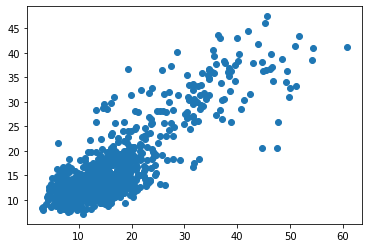

In [19]:
plt.scatter(y_test, final_predictions)

(array([  8.,  18., 120., 332., 277.,  86.,  24.,   7.,   3.,   2.]),
 array([-17.46782185, -13.01402453,  -8.5602272 ,  -4.10642988,
          0.34736745,   4.80116477,   9.25496209,  13.70875942,
         18.16255674,  22.61635407,  27.07015139]),
 <BarContainer object of 10 artists>)

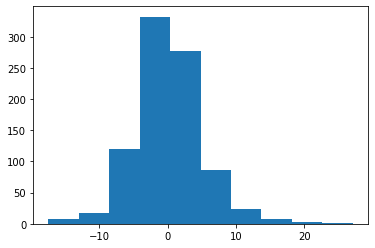

In [20]:
plt.hist(y_test - final_predictions)

In [21]:
final_rmse

5.033676781166301

In [22]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([4.65972491, 5.38170676])

In [23]:
import sklearn.metrics as sm

print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, final_predictions), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, final_predictions), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, final_predictions), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, final_predictions), 2))
print("R2 score =", round(sm.r2_score(y_test, final_predictions), 2))

Regressor model performance:
Mean absolute error(MAE) = 3.72
Mean squared error(MSE) = 25.34
Median absolute error = 2.8
Explain variance score = 0.71
R2 score = 0.71


In [24]:
def mean_absolute_percentage_error(y_test, final_predictions): 
    y_test, final_predictions = np.array(y_test), np.array(final_predictions)
    return np.mean(np.abs((y_test - final_predictions) / final_predictions)) * 100

In [25]:
print(mean_absolute_percentage_error(y_test, final_predictions))

24.17139112327695
